In [22]:
# loeme sisse vajalikud paketid
# numpy & pandas -> data manipulation
# yfinance aitab finants tickers sisse võtta
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


In [23]:
#loeme sisse S&P500 indexsi SPY 
df = yf.download("SPY", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [24]:
#saab ka lugeda sisse mitmeid tickereid korraga
#microsoft, coca-cola, apple, google, nike, visa, kellogs, 20 aasta võlakiri ETF,  
#Seekord võtame ainult SPY

symbols_multiple = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", 
symbols = "SPY" 

In [25]:
#df -> dataframe
#df_multiple_symbols -> lisame ylevalt symbolid sisse 
df = yf.download(symbols, start="2013-01-01", end="2023-01-01")
df_multiple_symbols = yf.download(symbols_multiple, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  8 of 8 completed


In [26]:
#vaatame dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.399666,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.127686,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.655174,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.325523,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.979279,121265100
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839294,70911500


In [27]:
#võtame Close dataframist
close = df["Close"]

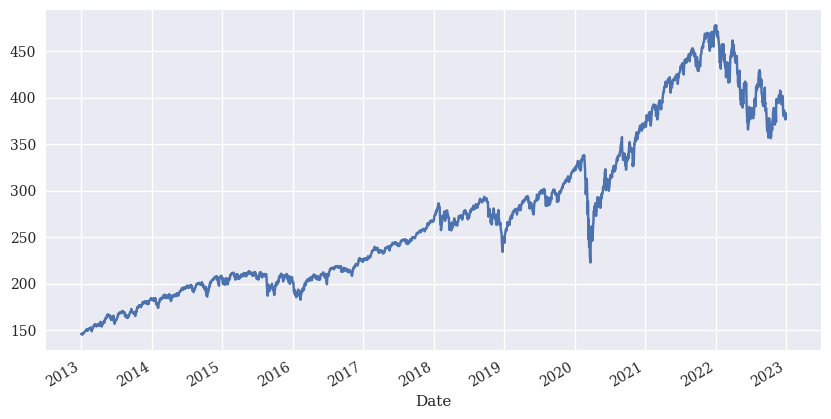

In [28]:
#SPY close hind pildina
close.plot(figsize=(10,5), subplots=True);

In [29]:
#SPY close hind yhikud, mea, standard deviation, min, 25%, 50%, 75%, max
close.describe().round(2) 

count    2518.00
mean      273.95
std        86.89
min       145.55
25%       205.14
50%       258.24
75%       326.81
max       477.71
Name: Close, dtype: float64

In [30]:
#SPY close hind erinevad mõõtmed, 2 kohta peale koma
close.aggregate([min, np.mean, np.std, np.median,max]).round(2)

min       145.55
mean      273.95
std        86.89
median    258.24
max       477.71
Name: Close, dtype: float64

In [31]:
#SPY percent hinnamuutus võtame 3 peale koma
close.pct_change().round(3).head()

Date
2013-01-02      NaN
2013-01-03   -0.002
2013-01-04    0.004
2013-01-07   -0.003
2013-01-08   -0.003
Name: Close, dtype: float64

In [32]:
#close diff().mean()
close.diff().mean()

0.09390941403146107

In [33]:
#dataframe mitmed symbolid ja close hind ainult
df_multiple_symbols = df_multiple_symbols["Close"] 

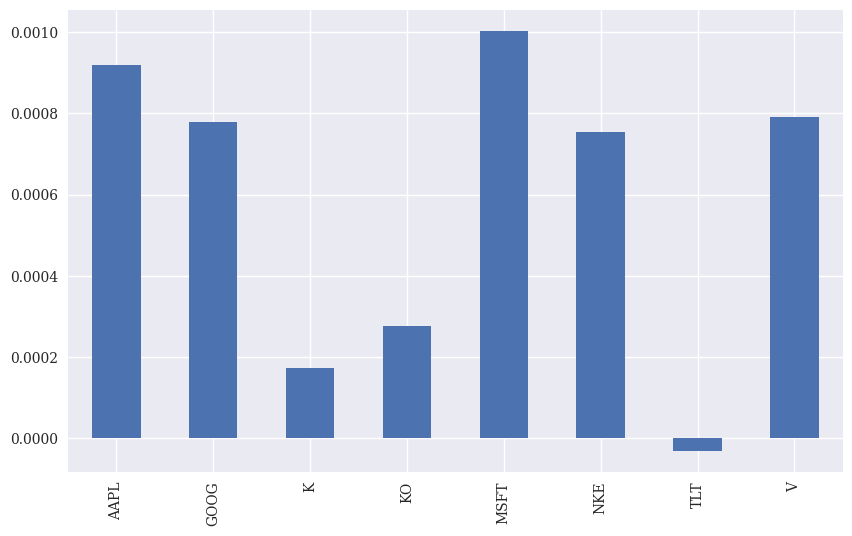

In [38]:
#mitmed symbolid nende precent vahe ja mean
df_multiple_symbols.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [35]:
#logaritmilised return vektori moodi
rets = np.log(df_multiple_symbols / df_multiple_symbols.shift(1))

In [39]:
#logarimilised tulemused ja kolm kohta peale koma
rets.head().round(3) 

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.013,0.001,-0.007,0.000,-0.013,0.010,-0.014,0.001
2013-01-04,-0.028,0.020,0.002,0.002,-0.019,0.010,0.004,0.008
2013-01-07,-0.006,-0.004,0.000,-0.010,-0.002,0.002,0.000,0.007
2013-01-08,0.003,-0.002,0.003,-0.007,-0.005,-0.011,0.007,0.009


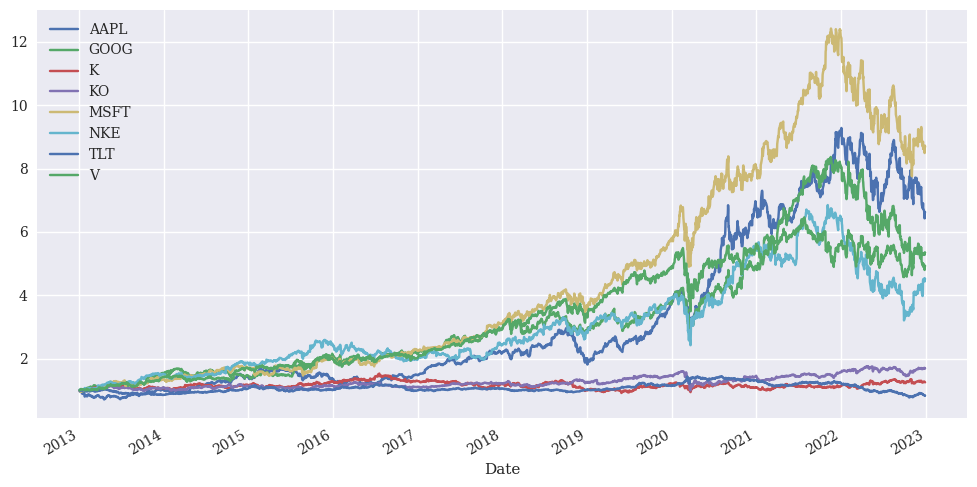

In [40]:
#cumsum() on kumulatiivne summa 
# Erinevad stock tulemused 
rets.cumsum().apply(np.exp).plot(figsize=(12, 6));

In [42]:
#vaatame tablelist millised tulemused on 
#parim Apple 6.6x investment ja halvim 20 aasta võlakirja ETF
rets.cumsum().apply(np.exp)

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.000581,0.993147,1.000000,0.986604,1.010224,0.986450,1.000772
2013-01-04,0.959875,1.020353,0.995256,1.001596,0.968139,1.020062,0.990298,1.008946
2013-01-07,0.954228,1.015901,0.995607,0.992021,0.966329,1.021605,0.990716,1.016154
2013-01-08,0.956797,1.013896,0.998946,0.985106,0.961260,1.010802,0.997240,1.025615
...,...,...,...,...,...,...,...,...
2022-12-23,6.724733,4.985642,1.268318,1.697340,8.643374,4.484954,0.854466,5.298751
2022-12-27,6.631405,4.881277,1.276928,1.707713,8.579290,4.535494,0.837571,5.310593
2022-12-28,6.427919,4.799672,1.260235,1.690692,8.491310,4.435957,0.832636,5.277127


In [53]:
# Mitmed andmed 1 nädalase intervalliga ja ainult esimsed
df_multiple_symbols.resample('1w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2012-12-30,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,118.400002,39.192501
2013-01-06,18.582144,18.430668,57.020000,36.910000,26.830000,26.549999,119.849998,40.290001
2013-01-13,17.857143,17.546980,58.209999,37.700001,27.250000,26.645000,120.040001,39.567501
2013-01-20,15.710000,18.771391,58.840000,37.049999,27.879999,27.775000,118.029999,39.959999
2013-01-27,16.200714,19.317593,58.650002,37.540001,27.930000,26.850000,115.540001,39.639999


In [59]:
# Mitmed andmed 5 nädalase intervalliga
df_multiple_symbols.resample('5w', label='left').last().head()

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2012-12-02,18.821428,18.380356,56.639999,37.660000,26.740000,26.440001,118.400002,39.192501
2013-01-06,16.963572,19.560930,58.910000,38.770000,27.549999,27.295000,117.120003,39.450001
2013-02-10,15.845000,20.281481,62.200001,38.830002,28.040001,27.389999,115.760002,39.637501
2013-03-17,13.947500,19.922077,66.099998,42.660000,29.770000,30.459999,122.830002,40.990002
2013-04-21,15.898214,21.751471,64.449997,42.240002,34.270000,31.395000,116.800003,45.112499


In [61]:
#1 kuu intervalliga
df_multiple_symbols.resample('1m', label='right').last().head() 

,AAPL,GOOG,K,KO,MSFT,NKE,TLT,V
Date,,,,,,,,
2013-01-31,16.267500,18.821701,58.500000,37.240002,27.450001,27.025000,117.320000,39.477501
2013-02-28,15.764286,19.955202,60.500000,38.720001,27.799999,27.230000,118.510002,39.660000
2013-03-31,15.809286,19.780607,64.430000,40.439999,28.610001,29.504999,117.760002,42.459999
2013-04-30,15.813571,20.537271,65.040001,42.330002,33.099998,31.799999,123.010002,42.115002
2013-05-31,16.061787,21.699165,62.049999,39.990002,34.900002,30.830000,114.449997,44.535000
